# Airline Passenger Satisfaction
About DataSet-->


Gender: Gender of the passengers (Female, Male)

Customer Type: The customer type (Loyal customer, disloyal customer)

Age: The actual age of the passengers

Type of Travel: Purpose of the flight of the passengers (Personal Travel, Business Travel)

Class: Travel class in the plane of the passengers (Business, Eco, Eco Plus)

Flight distance: The flight distance of this journey

Inflight wifi service: Satisfaction level of the inflight wifi service (0:Not Applicable;1-5)

Departure/Arrival time convenient: Satisfaction level of Departure/Arrival time convenient

Ease of Online booking: Satisfaction level of online booking

Gate location: Satisfaction level of Gate location

Food and drink: Satisfaction level of Food and drink

Online boarding: Satisfaction level of online boarding

Seat comfort: Satisfaction level of Seat comfort

Inflight entertainment: Satisfaction level of inflight entertainment

On-board service: Satisfaction level of On-board service

Leg room service: Satisfaction level of Leg room service

Baggage handling: Satisfaction level of baggage handling

Check-in service: Satisfaction level of Check-in service

Inflight service: Satisfaction level of inflight service

Cleanliness: Satisfaction level of Cleanliness

Departure Delay in Minutes: Minutes delayed when departure

Arrival Delay in Minutes: Minutes delayed when Arrival

Satisfaction: Airline satisfaction level(Satisfaction, neutral or dissatisfaction)

In [1]:
#Import libaries 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use("dark_background")
import warnings 
warnings.filterwarnings("ignore")

In [2]:
#Import train and test dataset

trn_data = pd.read_csv("airline_train.csv")                        #Train data import
tst_data = pd.read_csv("airline_test.csv")                         #Test data import

#Concat of train and test data for preprocessing
data = pd.concat([trn_data,tst_data])

display(data.head(10))

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied
5,5,111157,Female,Loyal Customer,26,Personal Travel,Eco,1180,3,4,...,1,3,4,4,4,4,1,0,0.0,neutral or dissatisfied
6,6,82113,Male,Loyal Customer,47,Personal Travel,Eco,1276,2,4,...,2,3,3,4,3,5,2,9,23.0,neutral or dissatisfied
7,7,96462,Female,Loyal Customer,52,Business travel,Business,2035,4,3,...,5,5,5,5,4,5,4,4,0.0,satisfied
8,8,79485,Female,Loyal Customer,41,Business travel,Business,853,1,2,...,1,1,2,1,4,1,2,0,0.0,neutral or dissatisfied
9,9,65725,Male,disloyal Customer,20,Business travel,Eco,1061,3,3,...,2,2,3,4,4,3,2,0,0.0,neutral or dissatisfied


# Data Preprocessing

In [3]:
#data information
print(data.info())
#missing values check
print(data.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129880 entries, 0 to 25975
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         129880 non-null  int64  
 1   id                                 129880 non-null  int64  
 2   Gender                             129880 non-null  object 
 3   Customer Type                      129880 non-null  object 
 4   Age                                129880 non-null  int64  
 5   Type of Travel                     129880 non-null  object 
 6   Class                              129880 non-null  object 
 7   Flight Distance                    129880 non-null  int64  
 8   Inflight wifi service              129880 non-null  int64  
 9   Departure/Arrival time convenient  129880 non-null  int64  
 10  Ease of Online booking             129880 non-null  int64  
 11  Gate location                      12988

In [4]:
#Observation-- from above information we can see that tehere have few object type variables
#and rest are the int
#and in th arrival delay in minutes column have 393 missing values

array([[<AxesSubplot:title={'center':'Unnamed: 0'}>,
        <AxesSubplot:title={'center':'id'}>,
        <AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Flight Distance'}>],
       [<AxesSubplot:title={'center':'Inflight wifi service'}>,
        <AxesSubplot:title={'center':'Departure/Arrival time convenient'}>,
        <AxesSubplot:title={'center':'Ease of Online booking'}>,
        <AxesSubplot:title={'center':'Gate location'}>],
       [<AxesSubplot:title={'center':'Food and drink'}>,
        <AxesSubplot:title={'center':'Online boarding'}>,
        <AxesSubplot:title={'center':'Seat comfort'}>,
        <AxesSubplot:title={'center':'Inflight entertainment'}>],
       [<AxesSubplot:title={'center':'On-board service'}>,
        <AxesSubplot:title={'center':'Leg room service'}>,
        <AxesSubplot:title={'center':'Baggage handling'}>,
        <AxesSubplot:title={'center':'Checkin service'}>],
       [<AxesSubplot:title={'center':'Inflight service'}>,
    

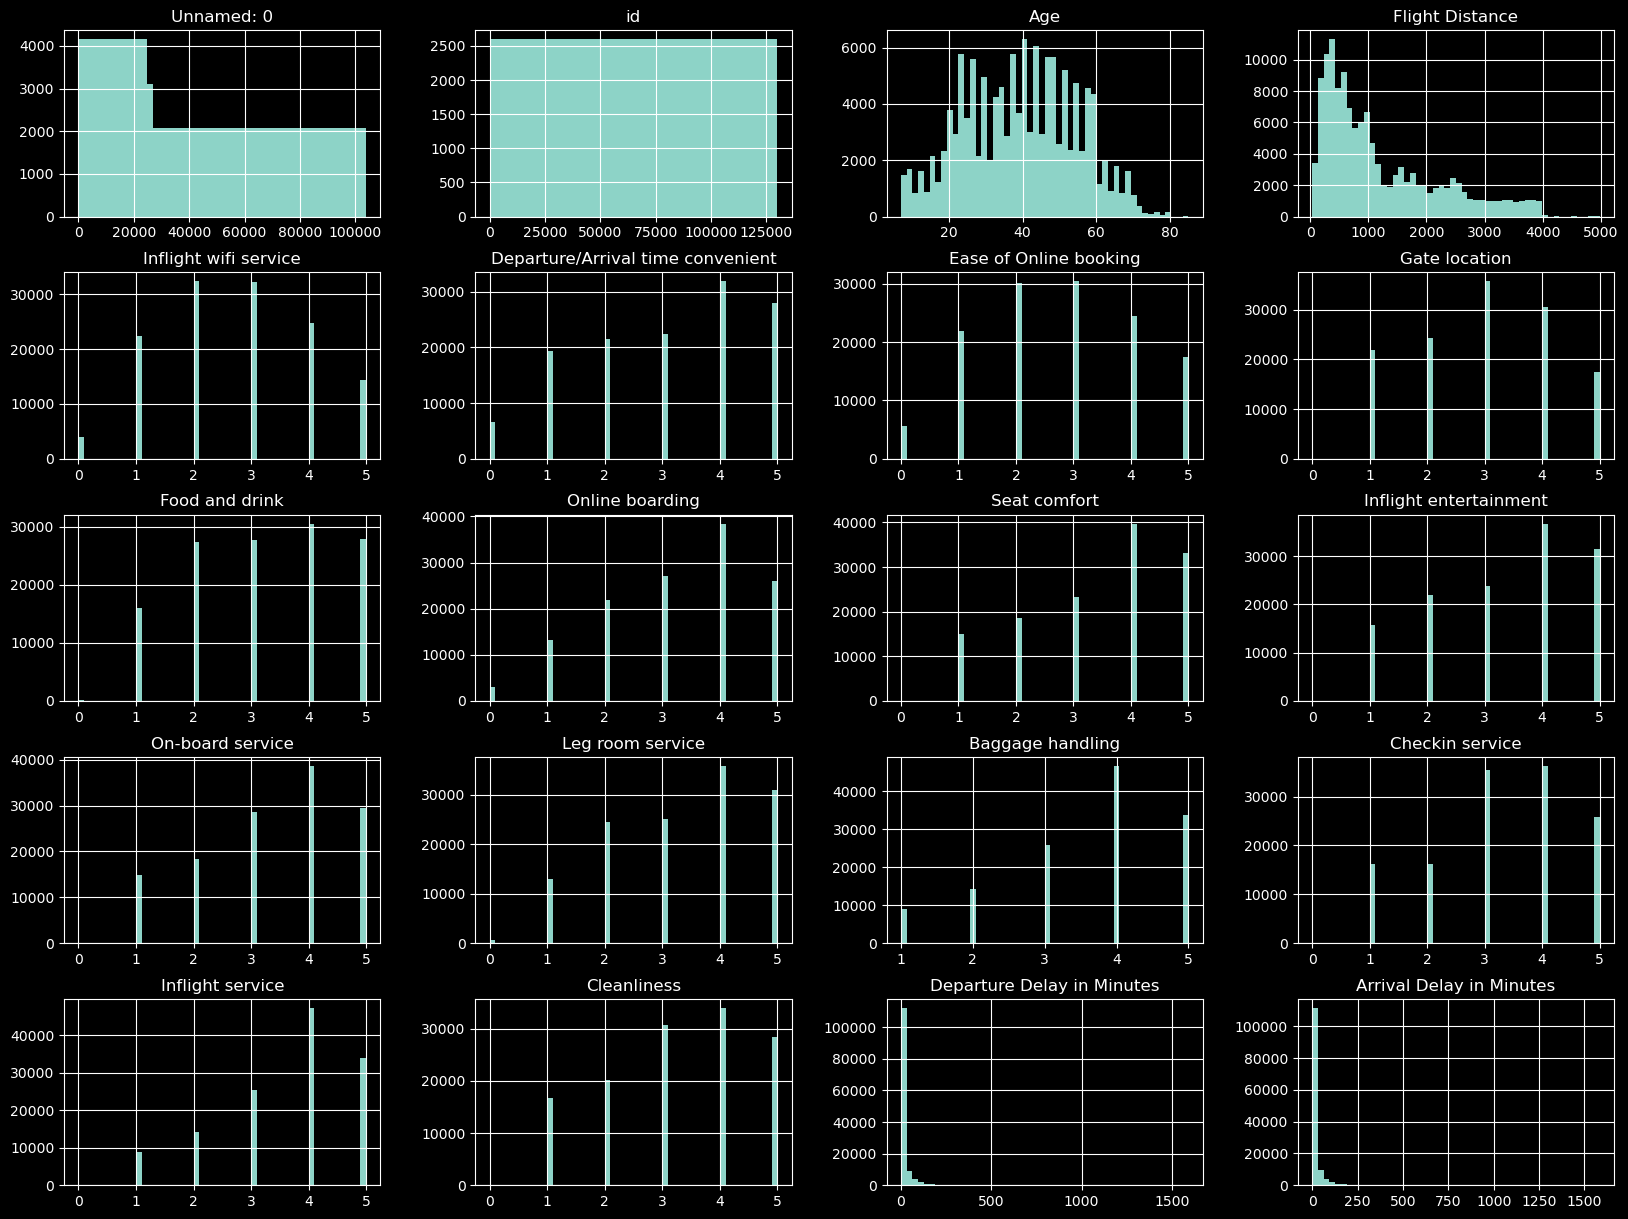

In [5]:
#Hist plot of all numerical data
data.hist(bins=50,figsize=(20,15))

In [6]:
#Categorical variables list
cat_cols = [col for col in data.columns if (data[col].dtypes=='O') & (col!='education')]
cat_cols

['Gender', 'Customer Type', 'Type of Travel', 'Class', 'satisfaction']

In [7]:
#For satisfaction column
satis_faction=pd.get_dummies(data["satisfaction"],drop_first=True)
data=pd.concat([data,satis_faction],axis=1)
data.drop(columns={"satisfaction"},axis=1,inplace=True)
print("Satisfaction column dummy vales add in categorical column deleted!")

Satisfaction column dummy vales add in categorical column deleted!


In [8]:
#Let's check missing values column Arrical Delay in Minutes
data["Arrival Delay in Minutes"].value_counts().head(10)

0.0    72753
1.0     2747
2.0     2587
3.0     2442
4.0     2373
5.0     2083
6.0     2021
7.0     1794
8.0     1751
9.0     1566
Name: Arrival Delay in Minutes, dtype: int64

In [9]:
#Observation -- from this operation we can say that most of the airplane not delayed they arrival at 
#their original time

<AxesSubplot:xlabel='Arrival Delay in Minutes'>

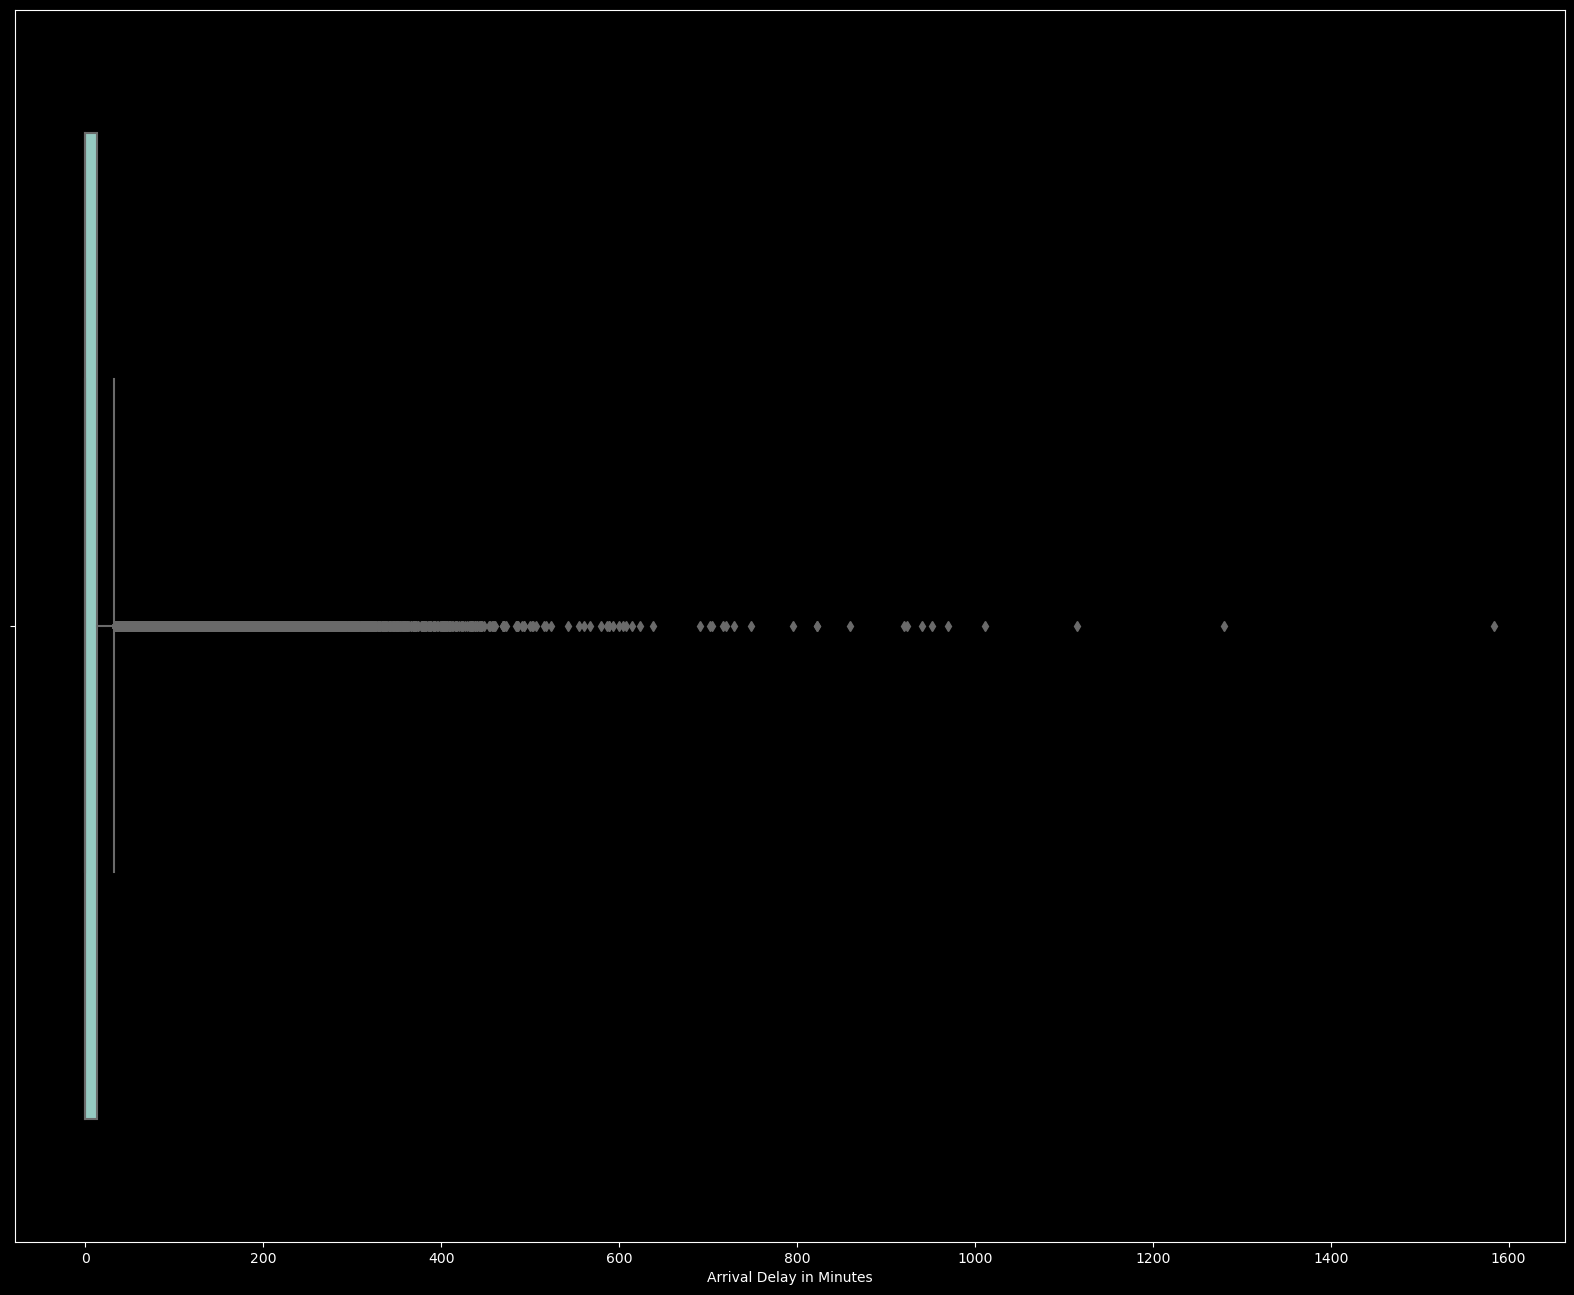

In [10]:
#lets check the outlier for the column Arrival Delay in Minutes
plt.figure(figsize=(20,16))
sns.boxplot(x="Arrival Delay in Minutes", data=data)

In [11]:
#Observation-- from above boxplot we can see that in this column ahev so much outlier 
#so i we replace the missing value with mean of the column then it will effect the data set
#So, first let's try to find out some relationship with other columns!!

In [12]:
#sns.distplot(data['satisfied'], kde = True, color = 'c')

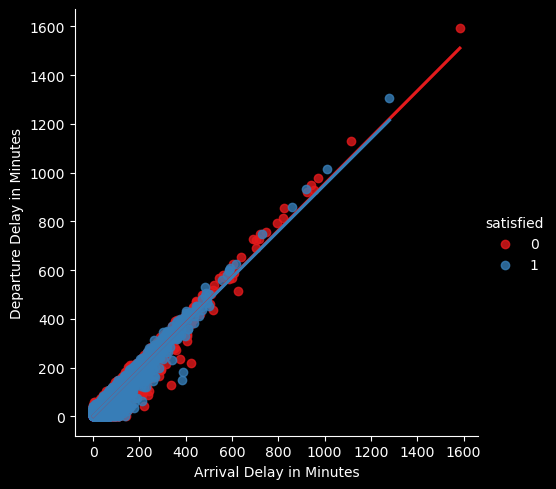

In [13]:
#plot of arrival delay and departure delay
sns.lmplot(x = 'Arrival Delay in Minutes', y = 'Departure Delay in Minutes',hue="satisfied", data=data, palette='Set1')

In [14]:
#Obesrvation-- from above plot we can easily see 
#that when arrival delay increased departure delay also increased
#so we will fill the missing value with the departure delay value

In [15]:
#Fixed Arrival Delay in Minutes variavles missing value
tmp = (pd.isna(data["Arrival Delay in Minutes"]))                  
data["Arrival Delay in Minutes"][tmp] = data["Departure Delay in Minutes"]   
print("Fixed missing values:",tmp.sum())

#check missing values count
print("Missing values left to fixed:",data["Arrival Delay in Minutes"].isnull().sum())

Fixed missing values: 393
Missing values left to fixed: 0


In [16]:
#we dont required unnamed and id column for our model so, let's drop those columns and make a copy of data
final_data = data.copy()             #Copy of data

final_data = final_data.drop(columns={"Unnamed: 0","id"},axis=1)             #drop unnamed: 0 and id column

In [17]:
#let's try to find out correlation fo features with labels--->
corr_metrics = final_data.corr()  
corr=corr_metrics["satisfied"].sort_values(ascending=False)               
corr

satisfied                            1.000000
Online boarding                      0.501749
Inflight entertainment               0.398234
Seat comfort                         0.348829
On-board service                     0.322205
Leg room service                     0.312424
Cleanliness                          0.307035
Flight Distance                      0.298085
Inflight wifi service                0.283460
Baggage handling                     0.248680
Inflight service                     0.244918
Checkin service                      0.237252
Food and drink                       0.211340
Ease of Online booking               0.168877
Age                                  0.134091
Gate location                       -0.002793
Departure Delay in Minutes          -0.050740
Departure/Arrival time convenient   -0.054270
Arrival Delay in Minutes            -0.057943
Name: satisfied, dtype: float64

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5]),
 [Text(0, 0.5, 'Age'),
  Text(0, 1.5, 'Flight Distance'),
  Text(0, 2.5, 'Inflight wifi service'),
  Text(0, 3.5, 'Departure/Arrival time convenient'),
  Text(0, 4.5, 'Ease of Online booking'),
  Text(0, 5.5, 'Gate location'),
  Text(0, 6.5, 'Food and drink'),
  Text(0, 7.5, 'Online boarding'),
  Text(0, 8.5, 'Seat comfort'),
  Text(0, 9.5, 'Inflight entertainment'),
  Text(0, 10.5, 'On-board service'),
  Text(0, 11.5, 'Leg room service'),
  Text(0, 12.5, 'Baggage handling'),
  Text(0, 13.5, 'Checkin service'),
  Text(0, 14.5, 'Inflight service'),
  Text(0, 15.5, 'Cleanliness'),
  Text(0, 16.5, 'Departure Delay in Minutes'),
  Text(0, 17.5, 'Arrival Delay in Minutes'),
  Text(0, 18.5, 'satisfied')])

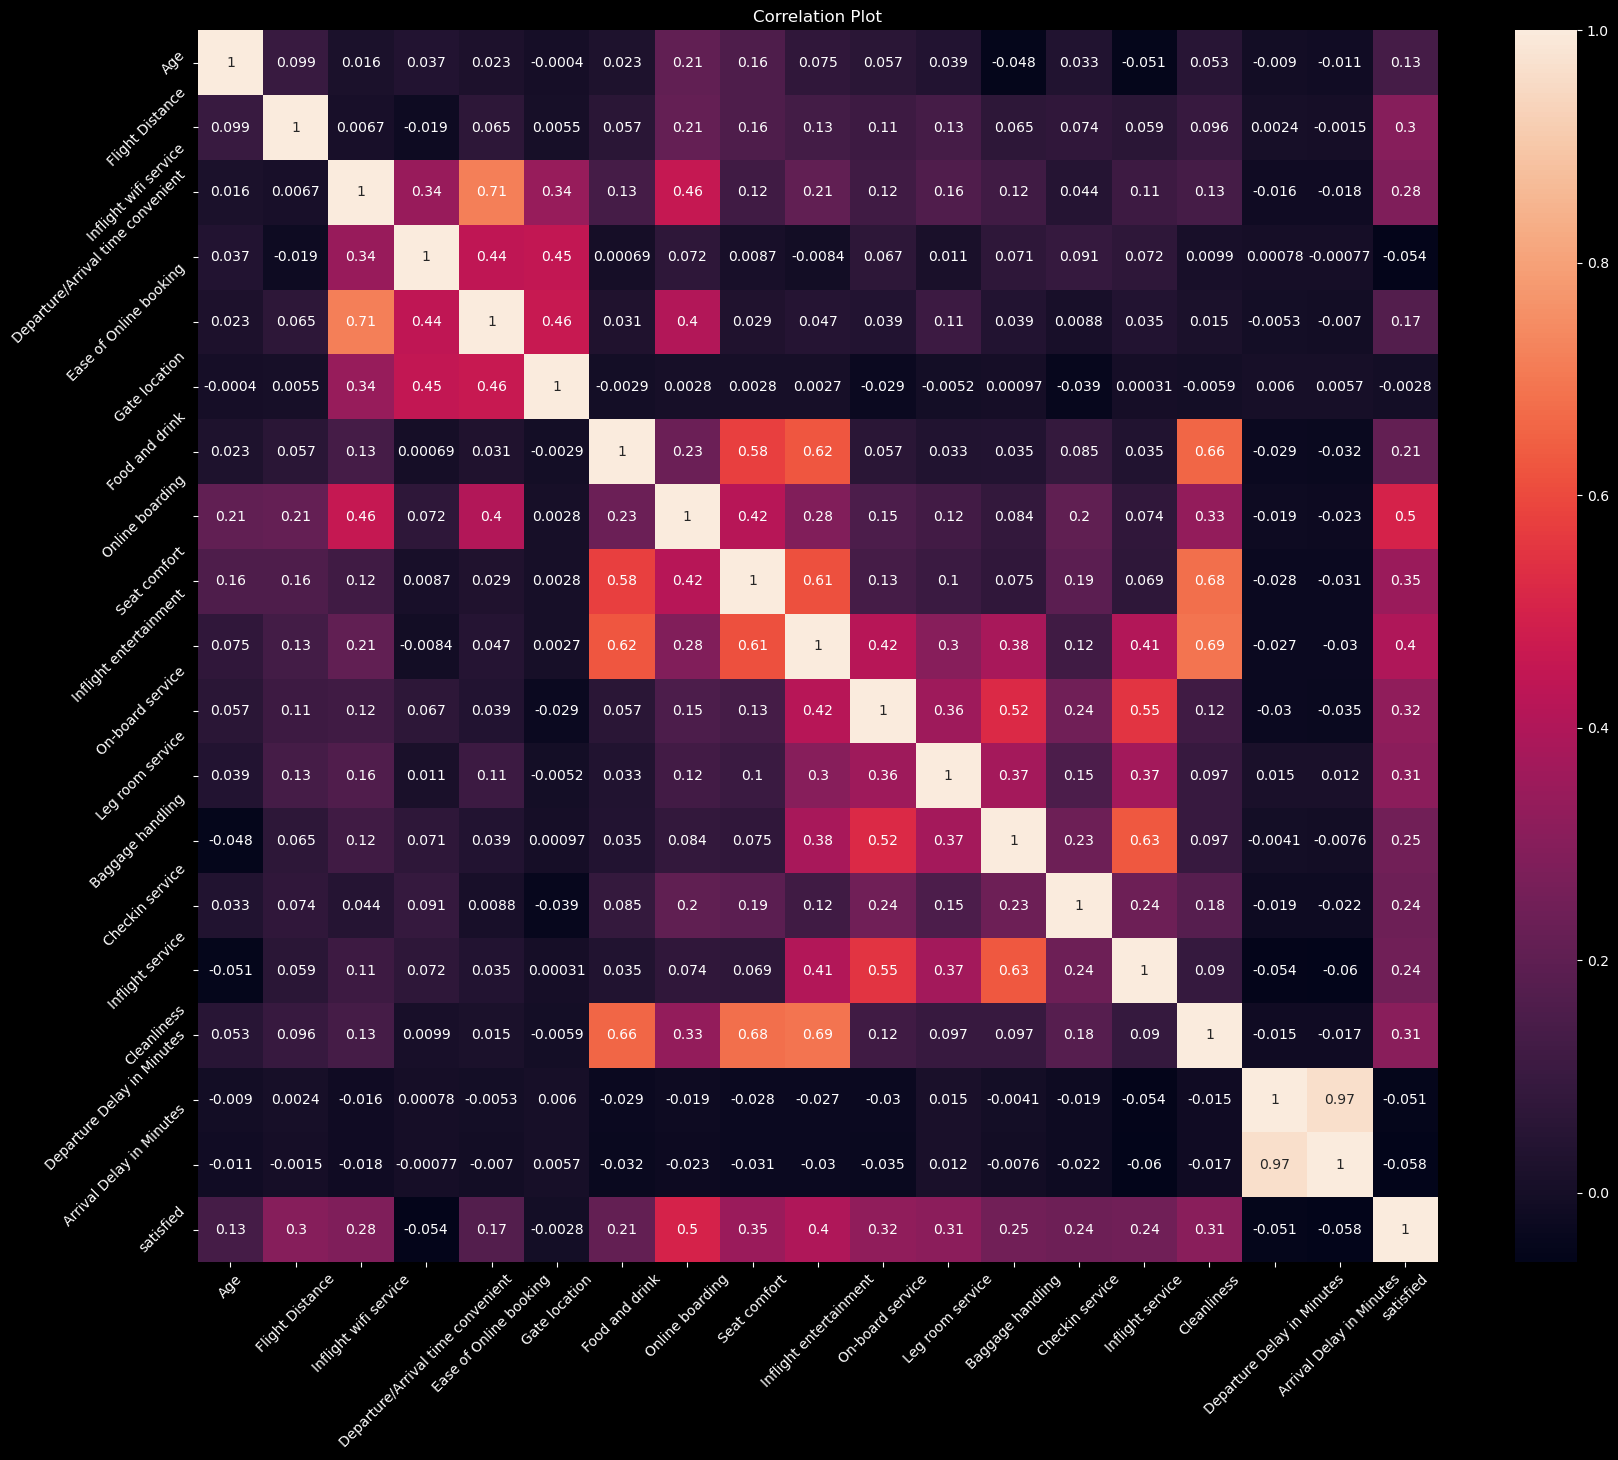

In [18]:
#Ploting correlation of all variables
plt.figure(figsize=(20,16))
#cmap = sns.diverging_palette(0, 230, 90, 60, as_cmap=True)
sns.heatmap(corr_metrics,annot=True)
plt.title("Correlation Plot")
plt.xticks(rotation=45)
plt.yticks(rotation=45)

In [19]:
#Observation -- online boarding variable is positively correlated with labels (satisfied)
#and personal travel colummn is negativel correlated with labels(satisfied)

In [20]:
#Separate features and labels-->
x = final_data.drop("satisfied",axis=1)                  #features data
y = final_data["satisfied"]                              #labels
print("Final_data is separated in features and labels!")

#Now split the daat into train test-->
from sklearn.model_selection import train_test_split
xx_train,x_test,yy_train,y_test = train_test_split(x,y, test_size=0.2, random_state=42)#split into train test

#Cross validation dataset--.
#From training dataset i will spearate cross validation data
x_train,x_val,y_train,y_val =train_test_split(xx_train,yy_train, test_size=0.1, random_state=42)

print('x_train data shape:',x_train.shape)
print('x_test data shape:',x_test.shape)
print('y_train data shape:',y_train.shape)
print('y_test data shape:',y_test.shape)
print("x_val data shape:",x_val.shape)
print("y_val data shape:",y_val.shape)

Final_data is separated in features and labels!
x_train data shape: (93513, 22)
x_test data shape: (25976, 22)
y_train data shape: (93513,)
y_test data shape: (25976,)
x_val data shape: (10391, 22)
y_val data shape: (10391,)


# Pipeline Build

In [66]:
#Import essential libaries
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

from sklearn import set_config
set_config(display="diagram")

In [23]:
#pipeline for numerical variables-->
num_pipeline = Pipeline([
    ("imputer",SimpleImputer(missing_values=np.nan,strategy="mean")),
    ("std_scaler",StandardScaler())
])


#Numerical columns list
num_cols = [col for col in x_train.columns if x_train[col].dtypes!='O']

#Categorical variables list
cat_col = [col for col in final_data.columns if (final_data[col].dtypes=='O') & (col!='education')]

#numerical column
num_attribs = list(num_cols)
cat_attribs = cat_col

#pipeline for numerical and categorical variables-->
full_pipeline = ColumnTransformer([
    ("num",num_pipeline,num_attribs),
    ("cat",OneHotEncoder(),cat_attribs)
])
main_pipeline = Pipeline([
    ("Features",full_pipeline),
    ("RFC",RandomForestClassifier())
])
#Full dataset prepared 
#x_train = full_pipeline.fit_transform(x_train)

#display full pipeline
main_piepline

In [51]:
# all features data scaling
x_train=full_pipeline.fit_transform(x_train)
x_test=full_pipeline.transform(x_test)
x_val=full_pipeline.transform(x_val)
print("x_train data scaling done")
print("x_test data scaling done")
print("x_val data scaling done")

x_train data scaling done
x_test data scaling done
x_val data scaling done


In [32]:
#Feed train data to model
main_pipeline.fit(x_train,y_train)
print("Training data is feeded to the model.")

#predicction on test data before using gridsearch cv
#prediction on test data
prediction=main_pipeline.predict(x_test)
print("Prediction is done for test data.")

#accuracy score-->
accuracy = accuracy_score(y_test,prediction)*100
print("Accuracy score of the model is:",accuracy)

#mean squared error-->
mse = mean_squared_error(y_test,prediction)
print("Mean squared error is:",mse)

#mean absolute error-->
mae = mean_absolute_error(y_test,prediction)
print("Mean absolute error is:",mae)

Training data is feeded to the model
Prediction is doen for test data
Accuracy score of the model is: 96.2580843855867
Mean squared error is: 0.03741915614413305
Mean absolute error is: 6.7257468432399135


# Grid Search

In [72]:
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import SGDClassifier
#add params for grid search cv
parameters = [
    {
        'clf__estimator': [SGDClassifier()], # SVM if hinge loss / logreg if log loss
        'clf__estimator__penalty': ('l2', 'elasticnet', 'l1'),
        'clf__estimator__max_iter': [50, 80],
        'clf__estimator__tol': [1e-4],
        'clf__estimator__loss': ['hinge', 'log', 'modified_huber'],
    },
    {
        'clf__estimator': [MultinomialNB()],
        'clf__estimator__alpha': (1e-2, 1e-3, 1e-1),
    },
]

#giving params to gridsearch cv
#RFC = RandomForestClassifier()
#DTC = DecisionTreeClassifier()
#grid_search = GridSearchCV(RFC,DTC,param_grid, cv=10,
                         # scoring="accuracy",
                         # return_train_score=True,verbose=5
                        #  )

#Feed val data to grid search cv
grid_search.fit(x_val,y_val)

#Finding best params
print('Best params:',grid_search.best_params_)
print('Best estimator:',grid_search.best_estimator_)

Fitting 10 folds for each of 44 candidates, totalling 440 fits
[CV 1/10] END max_features=2, n_estimators=3;, score=(train=0.982, test=0.908) total time=   0.0s
[CV 2/10] END max_features=2, n_estimators=3;, score=(train=0.984, test=0.901) total time=   0.0s
[CV 3/10] END max_features=2, n_estimators=3;, score=(train=0.984, test=0.903) total time=   0.0s
[CV 4/10] END max_features=2, n_estimators=3;, score=(train=0.983, test=0.902) total time=   0.0s
[CV 5/10] END max_features=2, n_estimators=3;, score=(train=0.984, test=0.917) total time=   0.0s
[CV 6/10] END max_features=2, n_estimators=3;, score=(train=0.984, test=0.906) total time=   0.0s
[CV 7/10] END max_features=2, n_estimators=3;, score=(train=0.983, test=0.897) total time=   0.0s
[CV 8/10] END max_features=2, n_estimators=3;, score=(train=0.980, test=0.895) total time=   0.0s
[CV 9/10] END max_features=2, n_estimators=3;, score=(train=0.983, test=0.894) total time=   0.0s
[CV 10/10] END max_features=2, n_estimators=3;, score=(

In [73]:
#Used for find out the all scoring params
#import sklearn
#sorted(sklearn.metrics.SCORERS.keys())

# Features Importance Finding

In [74]:
#Finding features importance
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances 

#Let’s display these importance scores next to their corresponding attribute names:
extra_attribs = ["Gender", "Class","Customer Type","Type of Travel"]
cat_encoder = full_pipeline.named_transformers_["cat"]
cat_one_hot_attribs = list(cat_encoder.categories_[0])
attributes = num_attribs + extra_attribs + cat_one_hot_attribs
sorted(zip(feature_importances, attributes), reverse=True)

[(0.16730659431032538, 'Online boarding'),
 (0.15554800156777548, 'Inflight wifi service'),
 (0.06321563876178331, 'Inflight entertainment'),
 (0.0577243012236748, 'Male'),
 (0.04857940652583034, 'Female'),
 (0.044482605663713745, 'Ease of Online booking'),
 (0.03920822142122286, 'Seat comfort'),
 (0.03707800128876152, 'Age'),
 (0.036591766104178476, 'Type of Travel'),
 (0.027803636875075657, 'Flight Distance'),
 (0.027581508140649705, 'Leg room service'),
 (0.0275437759531492, 'Inflight service'),
 (0.026174911469391986, 'Checkin service'),
 (0.023674635894112016, 'Baggage handling'),
 (0.018870200144212413, 'Customer Type'),
 (0.01863678813598688, 'Cleanliness'),
 (0.018124261348777097, 'Gate location'),
 (0.01806202095614761, 'Departure/Arrival time convenient'),
 (0.017610991156148184, 'On-board service'),
 (0.01288644587763757, 'Departure Delay in Minutes'),
 (0.012406430247630724, 'Arrival Delay in Minutes'),
 (0.007874796223946986, 'Food and drink'),
 (0.003081679716845869, 'Gen

# Evaluate Model on Test Data

In [76]:
#set final mdoel ith best estimators
final_model = grid_search.best_estimator_

#final prediction on test data
final_prediction = final_model.predict(x_test)

#error calculation on predicted value
ACCURACY = accuracy_score(y_test,final_prediction)*100               #accuracy check
print("Model Accuracy on test data:",ACCURACY)
 
MAE = mean_absolute_error(y_test,final_prediction)                   #mean aboslute error
print("Model mean absolute error on test data:",MAE)

MSE = mean_squared_error(y_test,final_prediction)                   #mean squared error
print("Model mean squared error on test data:",MSE)

#create a function to display how the model is
if ACCURACY >= 90:
    print("This model is outstanding!")
elif ACCURACY < 90 & ACCURACY >=80:
    print("This model is amazing!")
else:
    print("This mdoel is okay, try to improbe it by hyper tuning!")

Model Accuracy on test data: 95.11857098860487
Model mean absolute error on test data: 9.1034801355097
Model mean squared error on test data: 0.04881429011395134
This model is outstanding!


# Model pickle

In [77]:
import pickle
pickle.dump(main_pipeline,open("airline_model.pkl","wb"))
airline_model_load=pickle.load(open("airline_model.pkl","rb"))